### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [14]:
### Begin Assignment Here
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# categories
sentiment_name = ['negative', 'positive']
site_name = ['amazon', 'imdb', 'yelp']

### Load dataset

In [16]:
import pandas as pd
import re
# my functions
import helpers.data_mining_helpers as dmh


df1 = pd.read_csv('./dataset/sentiment labelled sentences/amazon_cells_labelled.txt', sep=r"\t",header=None)
df1.columns = ['text', 'sentiment']
df1['site'] = 'amazon'

df2 = pd.read_csv('./dataset/sentiment labelled sentences/imdb_labelled.txt', sep=r"\t",header=None)
df2.columns = ['text', 'sentiment']
df2['site'] = 'imdb'

df3 = pd.read_csv('./dataset/sentiment labelled sentences/yelp_labelled.txt', sep=r"\t",header=None)
df3.columns = ['text', 'sentiment']
df3['site'] = 'yelp'

X = pd.concat([df1,df2,df3], ignore_index=True)
X


C:\Users\cityrain72\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\cityrain72\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\cityrain72\anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='

text  sentiment    site
0     So there is no way for me to plug it in here i...          0  amazon
1                           Good case, Excellent value.          1  amazon
2                                Great for the jawbone.          1  amazon
3     Tied to charger for conversations lasting more...          0  amazon
4                                     The mic is great.          1  amazon
...                                                 ...        ...     ...
2995  I think food should have flavor and texture an...          0    yelp
2996                           Appetite instantly gone.          0    yelp
2997  Overall I was not impressed and would not go b...          0    yelp
2998  The whole experience was underwhelming, and I ...          0    yelp
2999  Then, as if I hadn't wasted enough of my life ...          0    yelp

[3000 rows x 3 columns]

In [17]:
X['sentiment_name'] = X.sentiment.apply(lambda t: dmh.format_labels(t, sentiment_name))

In [18]:
X

text  sentiment    site  \
0     So there is no way for me to plug it in here i...          0  amazon   
1                           Good case, Excellent value.          1  amazon   
2                                Great for the jawbone.          1  amazon   
3     Tied to charger for conversations lasting more...          0  amazon   
4                                     The mic is great.          1  amazon   
...                                                 ...        ...     ...   
2995  I think food should have flavor and texture an...          0    yelp   
2996                           Appetite instantly gone.          0    yelp   
2997  Overall I was not impressed and would not go b...          0    yelp   
2998  The whole experience was underwhelming, and I ...          0    yelp   
2999  Then, as if I hadn't wasted enough of my life ...          0    yelp   

     sentiment_name  
0          negative  
1          positive  
2          positive  
3          negative  
4          positive  
...             ...  
2995       negative  
2996       negative  
2997       negative  
2998       negative  
2999       negative  

[3000 rows x 4 columns]

### Check Missing value

In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                 site                      sentiment_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [20]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### Deal with duplicate object

In [21]:
len(X)

3000

In [22]:
sum(X.duplicated())

17

In [23]:
X.drop_duplicates(keep='first', inplace=True)

In [24]:
len(X)

2983

### Try sampling

In [25]:
X_sample = X.sample(n=1000) #random state
X_sample[0:4]

text  sentiment    site  \
2898  Highly unprofessional and rude to a loyal patron!          0    yelp   
1785                 I loved it, it was really scary.            1    imdb   
801                For the price this was a great deal.          1  amazon   
143                                  very disappointed.          0  amazon   

     sentiment_name  
2898       negative  
1785       positive  
801        positive  
143        negative

### Plotting the distribution

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
sentiment_name

['negative', 'positive']

In [28]:
# total of the 3 site
print(X.sentiment_name.value_counts())

negative    1493
positive    1490
Name: sentiment_name, dtype: int64


In [30]:
plt.style.use('ggplot') 

<AxesSubplot:title={'center':'Sentiment Distribution'}>

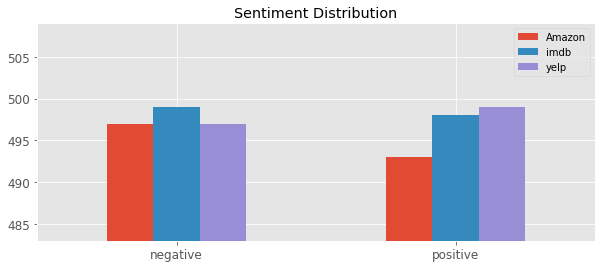

In [47]:
# Get the distribution for each site
vc1 = (X.loc[lambda f: f.site == 'amazon'].sentiment_name.value_counts())
vc2 = (X.loc[lambda f: f.site == 'imdb'].sentiment_name.value_counts())
vc3 = (X.loc[lambda f: f.site == 'yelp'].sentiment_name.value_counts())

# concat them and plot in the propriate range,
upper_bound = max(max(vc1), max(vc2), max(vc3)) + 10
lower_bound = min(min(vc1), min(vc2), min(vc3)) - 10

concat_vc = pd.concat([vc1, vc2, vc3], axis=1)
concat_vc.columns = ['Amazon', 'imdb', 'yelp']
concat_vc.plot(kind = 'bar',
                title = 'Sentiment Distribution',
                ylim = [lower_bound, upper_bound], 
                rot = 0, fontsize = 12, figsize = (10,4))

### Feature creation

In [48]:
import nltk

In [49]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [51]:
X[0:4]

text  sentiment    site  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   

  sentiment_name                                           unigrams  
0       negative  [So, there, is, no, way, for, me, to, plug, it...  
1       positive               [Good, case, ,, Excellent, value, .]  
2       positive                      [Great, for, the, jawbone, .]  
3       negative  [Tied, to, charger, for, conversations, lastin...

### Feature subset selection

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [53]:
# We can check the shape of this matrix by:
X_counts.shape

(2983, 5155)

In [54]:
count_vect.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

In [55]:
X[0:5]

text  sentiment    site  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
4                                  The mic is great.          1  amazon   

  sentiment_name                                           unigrams  
0       negative  [So, there, is, no, way, for, me, to, plug, it...  
1       positive               [Good, case, ,, Excellent, value, .]  
2       positive                      [Great, for, the, jawbone, .]  
3       negative  [Tied, to, charger, for, conversations, lastin...  
4       positive                           [The, mic, is, great, .]

[]

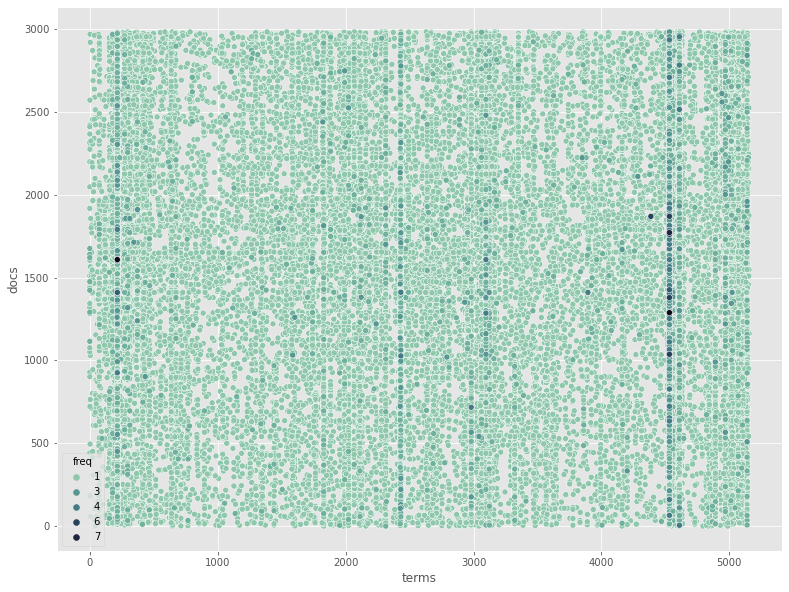

In [61]:
import numpy as np
import seaborn as sns

plot_z = X_counts.tocoo()

fig = plt.figure(figsize=(13, 10))
pt_arr = np.stack((plot_z.row, plot_z.col, plot_z.data), axis=-1)
df = pd.DataFrame(pt_arr, columns=['docs','terms', 'freq']).sort_values(by=['freq'], axis=0)
cmap = sns.cubehelix_palette(rot=-.4, light=0.7, dark=0.05, as_cmap=True)
ax = sns.scatterplot(data=df, x="terms", y="docs", hue="freq", palette=cmap)
ax.plot()

### Dimensionality Reduction

#### Reduce to 2D

In [62]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2983, 2)

In [63]:
sentiment_name

['negative', 'positive']

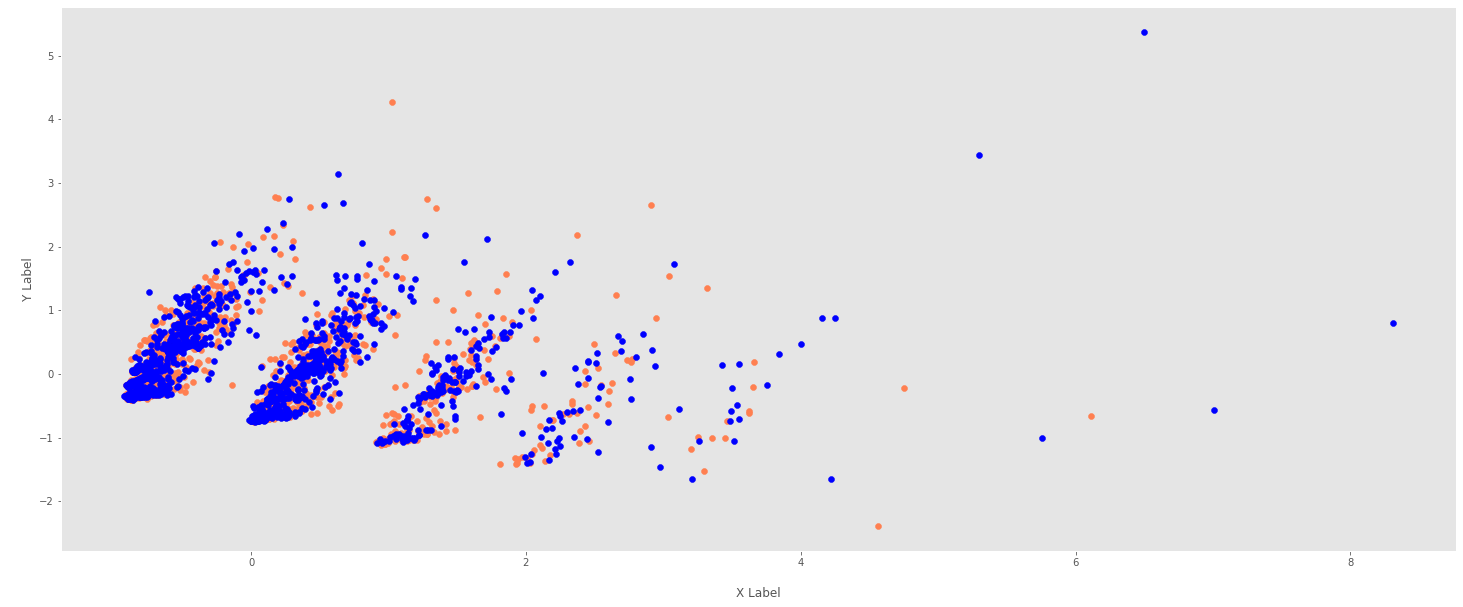

In [64]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiment in zip(col, sentiment_name):
    xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
    ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Reduce to 3D

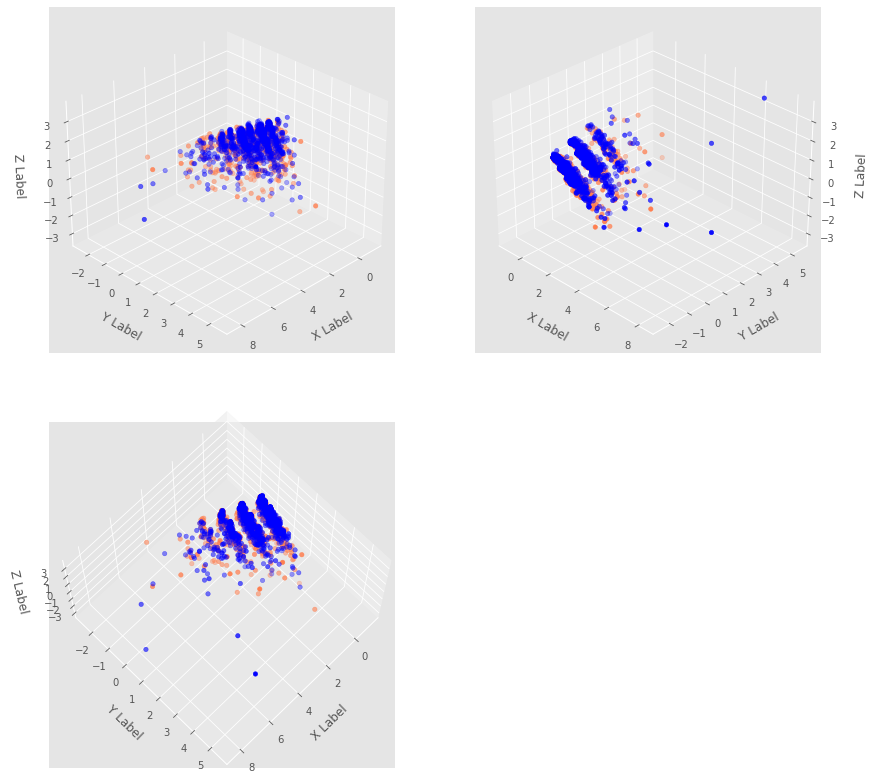

In [70]:
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')

for c, sentiment in zip(col, sentiment_name):
    xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
    ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
    zs = X_reduced[X['sentiment_name'] == sentiment].T[2]
    
    ax1.scatter(xs, ys, zs, c = c, marker='o', zdir='z', )
    ax2.scatter(xs, ys, zs, c = c, marker='o', zdir='z')
    ax3.scatter(xs, ys, zs, c = c, marker='o', zdir='z')
    

ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=-45)
ax3.view_init(elev=70, azim=45)
plt.show()

# Angles:
#
#   Front | Side
#  -------------
#   Above |

### Atrribute Transformation / Aggregation

In [71]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [72]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

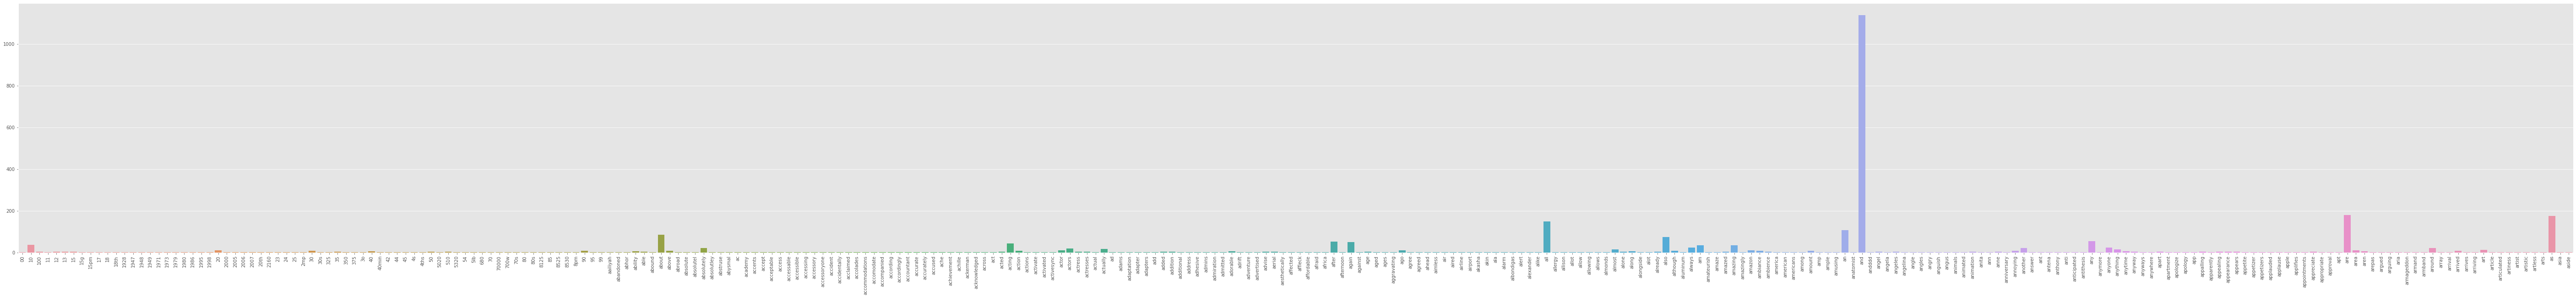

In [75]:
# ploting only first 300 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [76]:
term_frequencies.shape

(5155,)

#### try to use plotly

In [77]:
# Still only showing the first 300 terms
import plotly.express as px

df_term_freq = pd.DataFrame(term_frequencies, columns=['freq'], index=count_vect.get_feature_names())
fig = px.bar(df_term_freq[:300], y="freq")
fig.show()

In [79]:
# Now we try to show more terms. 
# But instead of showing all of them, we only show the terms with frequency > 15
reduced_df = df_term_freq[df_term_freq['freq'] > 15] 
fig = px.bar(reduced_df, y="freq")
fig.show()

#### Lets observe the long tail

In [80]:
sorted_df = reduced_df.sort_values(by='freq', ascending=False)
fig = px.bar(sorted_df, y="freq")
fig.show()

#### now we try to transform them into log distribution

In [81]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

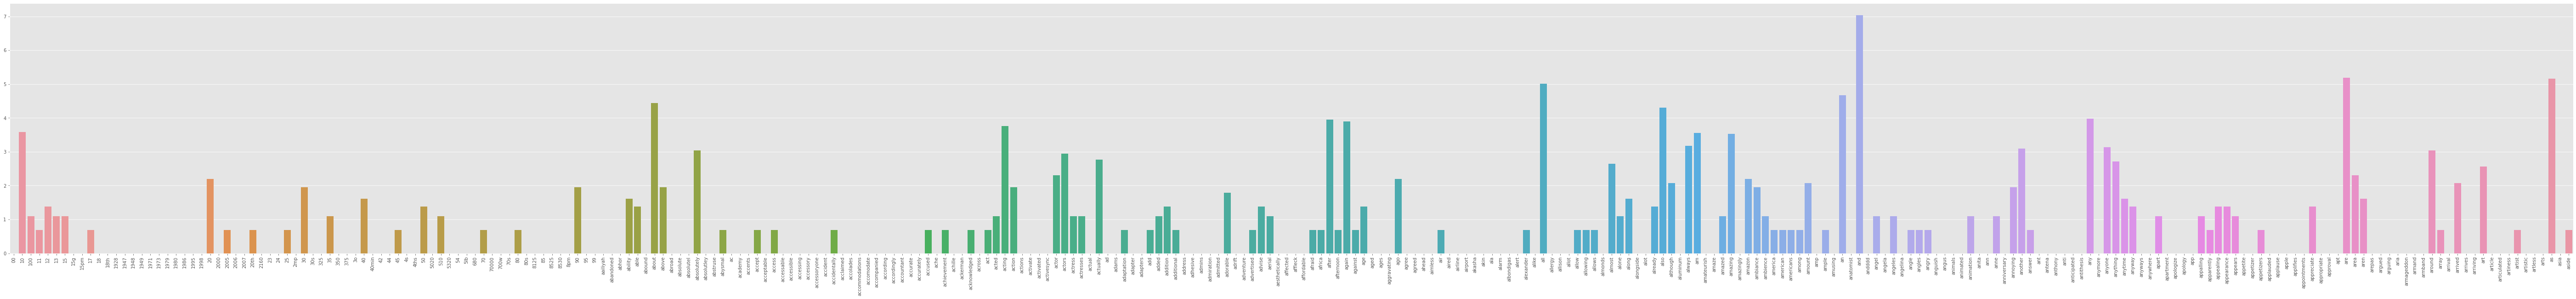

In [82]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [87]:
df_term_freq_log = pd.DataFrame(term_frequencies_log, columns=['freq'], index=count_vect.get_feature_names())
fig = px.bar(df_term_freq_log[:300], y="freq")
fig.show()

In [91]:
reduced_df_log = df_term_freq_log[df_term_freq_log['freq'] > 2.5] 
fig = px.bar(reduced_df_log, y="freq")
fig.show()

In [92]:
sorted_df_log = reduced_df_log.sort_values(by='freq', ascending=False)
fig = px.bar(sorted_df_log, y="freq")
fig.show()

### Discretization and Binarization

In [95]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)


LabelBinarizer()

In [96]:
mlb.classes_

array([0, 1], dtype=int64)

In [97]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [98]:
X[0:9]

text  sentiment    site  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
4                                  The mic is great.          1  amazon   
5  I have to jiggle the plug to get it to line up...          0  amazon   
6  If you have several dozen or several hundred c...          0  amazon   
7        If you are Razr owner...you must have this!          1  amazon   
8                Needless to say, I wasted my money.          0  amazon   

  sentiment_name                                           unigrams  \
0       negative  [So, there, is, no, way, for, me, to, plug, it...   
1       positive               [Good, case, ,, Excellent, value, .]   
2       positive                      [Great, for, the, jawbone, .]   
3       negative  [Tied, to, charger, for, conversations, lastin...   
4       positive                           [The, mic, is, great, .]   
5       negative  [I, have, to, jiggle, the, plug, to, get, it, ...   
6       negative  [If, you, have, several, dozen, or, several, h...   
7       positive  [If, you, are, Razr, owner, ..., you, must, ha...   
8       negative    [Needless, to, say, ,, I, wasted, my, money, .]   

  bin_sentiment  
0           [0]  
1           [1]  
2           [1]  
3           [0]  
4           [1]  
5           [0]  
6           [0]  
7           [1]  
8           [0]

## Data Exploration

In [99]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [100]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [101]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


Since the documents are short, its difficult to find their similarity.